In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# 201501489 최영진

In [2]:
%matplotlib inline
import matplotlib.pyplot
import imageio
import glob

***correct_label: 0


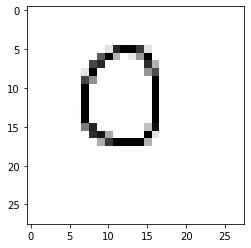

(28, 28)
[[255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 227  37   0   3  56 224 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255  92   0 180 255 234 153   0 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255  69  41 255 255 255 255 255  47 176 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 230   0 255 255 255 255 2

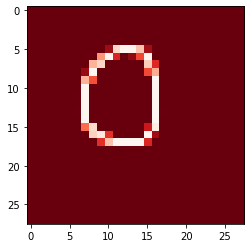

***correct_label: 1


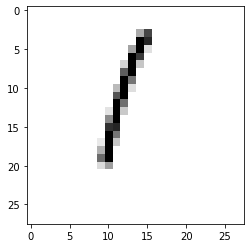

(28, 28)
[[255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 170  69 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255   0  38 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 163   0 224 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255   0  58 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 211   0 198 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255  93  

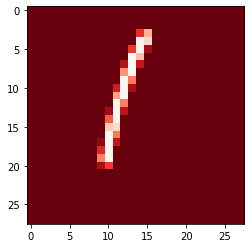

***correct_label: 2


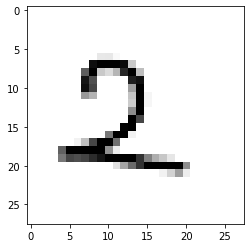

(28, 28)
[[255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 232 231 249 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255  13   0   0   0   9 201 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255  94   0 201 219 181  38  

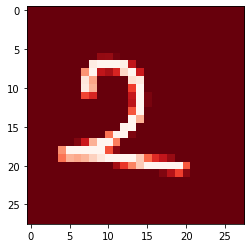

***correct_label: 3


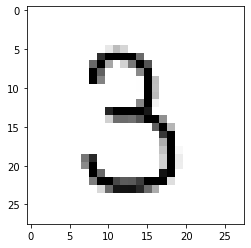

(28, 28)
[[255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 232 188 214 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255  47   0   0   0   0 106 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 106   0 166 255 210 120   0  84 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255   0  96 255 255 255 2

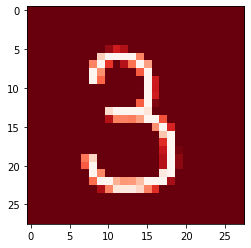

***correct_label: 4


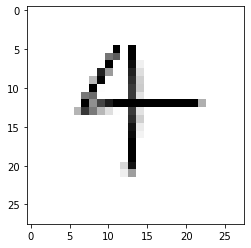

(28, 28)
[[255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255   0 255   0 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 117  92 255   0 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255   0 255 255  12 240 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255  34 155 255 255  

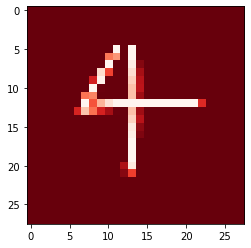

***correct_label: 5


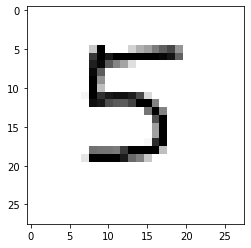

(28, 28)
[[255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 200   0 255 255 255 211 176 160 124  95
   71 149 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255  55   0  26   0   0   0   0   0   0   7
   20  97 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255  32   7  91 132 163 223 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255   9  92 255 255 255 2

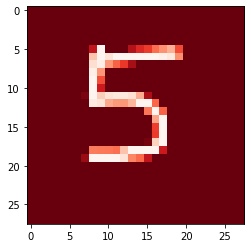

***correct_label: 6


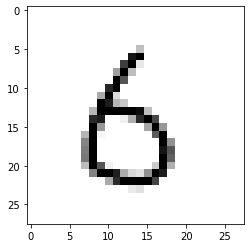

(28, 28)
[[255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 192 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255  22   0 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255  61   0 232 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 160   0 1

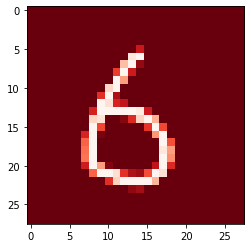

***correct_label: 7


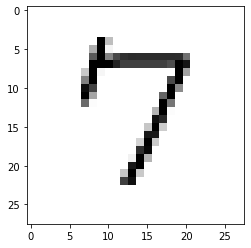

(28, 28)
[[255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255   0 190 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 174   0 244 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255  90   0 130  71  48  43  44  44  44  44
   44  45 112 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255   0   0   0  34  64  64  64  64  64  64
   78   0  21 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 200   0 246 255 255 255 2

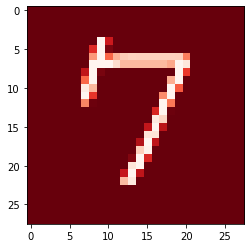

***correct_label: 8


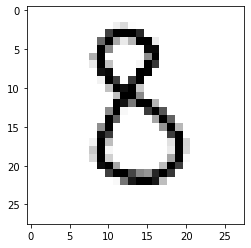

(28, 28)
[[255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 239 218 253 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255  64   0   0   0  40 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 106   0 168 234 181   0   0 236 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255   0 137 255 255 255 255   8   8 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 175   0 255 255 255 255 255 141   0 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 232   0 193 255 255 255 246   0  55 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255  16   6 255 255 2

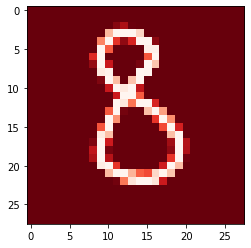

***correct_label: 9


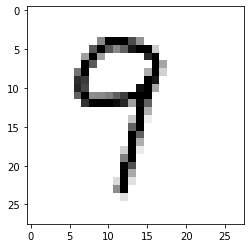

(28, 28)
[[255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 137   0   0   1  77 147 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255  87   0  86 136  97  23   0   0 204 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 158   0 161 255 255 255 255 255  42   0 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255   0  90 255 255 255 255 255 255 255   0 165
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 114   0 255 255 255 255 255 2

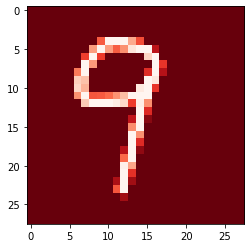

In [8]:
for image_file_name in glob.glob('my_own_images/my?.png'):
    correct_label = int(image_file_name[-5:-4])
    print("***correct_label:", correct_label)
    
    image_array = imageio.imread(image_file_name)
    
    matplotlib.pyplot.imshow(image_array, cmap = 'Reds', interpolation='None')
    matplotlib.pyplot.show()
    
    image_array = image_array[:,:,0] #***컬러를 그레이 스케일로 변환***
    print(image_array.shape)
    print(image_array)
    
    image_data = 255.0 - image_array.reshape(784) #28x28 행렬 값을 784개 값의 리스트로 재구성
    image_data = (image_data / 255.0 * 0.99) + 0.01 #색상 값 반전
    
    matplotlib.pyplot.imshow(image_array, cmap = 'Reds', interpolation = 'None')
    matplotlib.pyplot.show()

In [30]:
import numpy
# 시그모이드 함수 expit() 사용을 위해 scipy.special 불러오기
import scipy.special
# 행렬을 시각화하기 위한 라이브러리

#신경망 클래스의 정의 
class neuralNetwork:
    #신경망 초기화하기
    def __init__(self, inputnodes, hiddennodes,hiddennodes2, outputnodes, learningrate):
        #입력, 은닉, 출력 계층의 노드 개수 설정
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.hnodes2 = hiddennodes2
        self.onodes = outputnodes
        
        #가중치 행렬 wif와 whh와 who
        #배열 내 가중치는 w_i_j로 표기. 노드 i에서 다음 계층의 노드 j로 연결함을 의미
        #w11 w21
        #w12 w22 등
        self.wih = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
        self.whh = numpy.random.normal(0.0, pow(self.hnodes2, -0.5), (self.hnodes2, self.hnodes))
        self.who = numpy.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes2))

        
        #학습률
        self.lr = learningrate
        
        #활성화 함수로는 시그모이드 함수를 이용
        self.activation_function = lambda x: scipy.special.expit(x)
        
        pass
    
    #신경망 학습시키기
    def train(self, inputs_list, targets_list):
        #입력 리스트를 2차원의 행렬로 변환
        inputs = numpy.array(inputs_list, ndmin = 2).T
        targets = numpy.array(targets_list, ndmin = 2).T
        
        #은닉 계층으로 들어오는 신호를 계산
        hidden_inputs = numpy.dot(self.wih, inputs)
        #은닉 계층에서 나가는 신호를 계산
        hidden_outputs = self.activation_function(hidden_inputs)
        
        #두번째 은닉 계층으로 들어오는 신호를 계산
        hidden1_hidden2 = numpy.dot(self.whh, hidden_outputs)
        #두번째 은닉 계층에서 나가는 신호를 계산
        hidden2_outputs = self.activation_function(hidden1_hidden2)
        
        #최종 출력 계층으로 들어오는 신호를 계산
        final_inputs = numpy.dot(self.who, hidden2_outputs)
        #최종 출력 계층에서 나가는 신호를 계산
        final_outputs = self.activation_function(final_inputs)
        
        #출력 계층의 오차는 (실제 값 - 계산 값)
        output_errors = targets - final_outputs
        #은닉 계층의 오차는 가중치에 의해 나뉜 출력 계층의 오차들을 재조합해 계산
        hidden2_errors = numpy.dot(self.who.T, output_errors)
        hidden1_errors = numpy.dot(self.whh.T, hidden2_errors)
        

        #은닉 계층과 출력 계층 간의 가중치 업데이트
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden2_outputs))
        

        #은닉 계층과 은닉 계층 간의 가중치 업데이트
        self.whh += self.lr * numpy.dot((hidden2_errors * hidden2_outputs * (1.0 - hidden2_outputs)), numpy.transpose(hidden_outputs))

     
        #입력 계층과 은닉 계층 간의 가중치 업데이트
        self.wih += self.lr * numpy.dot((hidden1_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))

        
        pass
    
    
    #신경망에 질의하기
    def query(self, inputs_list):
        #입력 리스트를 2차원 행렬로 변환
        inputs = numpy.array(inputs_list, ndmin = 2).T
        
        #은닉 계층으로 들어오는 신호를 계산
        hidden_inputs = numpy.dot(self.wih, inputs)
        #은닉 계층에서 나가는 신호를 계산
        hidden_outputs = self.activation_function(hidden_inputs)
        
        #두 번째 은닉 계층으로 들어오는 신호를 계산
        hidden1_hidden2 = numpy.dot(self.whh, hidden_outputs)
        #두 번째 은닉 계층에서 나가는 신호를 계산
        hidden2_outputs = self.activation_function(hidden1_hidden2)
        
        #최종 출력 계층으로 들어오는 신호를 계산
        final_inputs = numpy.dot(self.who, hidden2_outputs)
        #최종 출력 계층에서 나가는 신호를 계산
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs

In [33]:
# load the mnist training data CSV file into a list
training_data_file = open("mnist_dataset/mnist_train.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

## 그림판 손글씨

In [125]:
#입력, 은닉, 출력 노드의 수
input_nodes = 784
hidden_nodes1 = 200
hidden_nodes2 = 100
output_nodes = 10

#학습률
learning_rate = 0.05

#신경망의 인스턴스 생성
n = neuralNetwork(input_nodes, hidden_nodes1, hidden_nodes2, 
                  output_nodes, learning_rate)

In [126]:
# 신경망 학습시키기

# 주기(epoch)란 학습 데이터가 학습을 위해 사용되는 횟수를 의미
epochs = 10

for e in range(epochs):
    
    # 학습 데이터 모음 내의 모든 레코드 검색
    for record in training_data_list:
        #레코드를 분리
        all_values = record.split(',')
        #입력 값의 범위와 값 조정
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 *0.99) + 0.01
        #결과 값 생성 (실제 값인 0.99 외에는 모두 0.01)
        targets = numpy.zeros(output_nodes) + 0.01
        #all_values[0]는 이 레코드에 대한 결과 값
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)
        

        pass
    print("epochs ", e, " done")
pass

epochs  0  done
epochs  1  done
epochs  2  done
epochs  3  done
epochs  4  done
epochs  5  done
epochs  6  done
epochs  7  done
epochs  8  done
epochs  9  done


***correct_label: 0
network says  0


<AxesSubplot:>

***correct_label: 1
network says  1


<AxesSubplot:>

***correct_label: 2
network says  2


<AxesSubplot:>

***correct_label: 3
network says  3


<AxesSubplot:>

***correct_label: 4
network says  4


<AxesSubplot:>

***correct_label: 5
network says  5


<AxesSubplot:>

***correct_label: 6
network says  5


<AxesSubplot:>

***correct_label: 7
network says  7


<AxesSubplot:>

***correct_label: 8
network says  8


<AxesSubplot:>

***correct_label: 9
network says  3


<AxesSubplot:>

[1, 1, 1, 1, 1, 1, 0, 1, 1, 0]
first nodes =  200 second nodes =  100 rate =  0.05 performance =  0.8


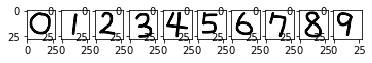

In [128]:
scorecard = []

position = 1
for image_file_name in glob.glob('my_own_images/my_?.png'):
    correct_label = int(image_file_name[-5:-4])
    print("***correct_label:", correct_label)
    
    image_array = imageio.imread(image_file_name)    
    image_array = image_array[:,:,0] #***컬러를 그레이 스케일로 변환***
    
    image_data = 255.0 - image_array.reshape(784) 
    #28x28 행렬 값을 784개 값의 리스트로 재구성
    image_data = (image_data / 255.0 * 0.99) + 0.01 #색상 값 반전
        
    # query the network
    outputs = n.query(image_data)
        
    # the index of the highest value corresponds to the label
    label = numpy.argmax(outputs)
    print("network says ", label)
        
    matplotlib.pyplot.subplot(1,10,position)
    matplotlib.pyplot.imshow(image_data.reshape(28,28), cmap='Greys', 
                             interpolation='None')
    position += 1;
    
    if (label == correct_label):
        #정답인 경우 성적표에 1을 더해 줌
        scorecard.append(1)
    else:
        #정답이 아닌 경우 성적표에 0을 더해 줌
        scorecard.append(0)
        pass
    pass

print(scorecard)
scorecard_array = numpy.asarray(scorecard)
print("first nodes = ", hidden_nodes1, "second nodes = ",hidden_nodes2, 
      "rate = ", learning_rate, "performance = ", 
      scorecard_array.sum()/ scorecard_array.size)

## 종이 손글씨

epochs  0  done
epochs  1  done
epochs  2  done
epochs  3  done
epochs  4  done
epochs  5  done
epochs  6  done
epochs  7  done
epochs  8  done
epochs  9  done
***correct_label: 2
[[0.0923821 ]
 [0.01767907]
 [0.7842183 ]
 [0.06071342]
 [0.00370747]
 [0.00512073]
 [0.0123701 ]
 [0.01225647]
 [0.03572021]
 [0.02696491]]
network says  2


<AxesSubplot:>

***correct_label: 0
[[0.95966846]
 [0.00818355]
 [0.01139819]
 [0.01117028]
 [0.00304249]
 [0.00418445]
 [0.01376309]
 [0.02205794]
 [0.02426394]
 [0.01004794]]
network says  0


<AxesSubplot:>

***correct_label: 1
[[0.03987335]
 [0.00721449]
 [0.00545526]
 [0.00559393]
 [0.01654792]
 [0.03907475]
 [0.01918859]
 [0.00499341]
 [0.92350445]
 [0.01233494]]
network says  8


<AxesSubplot:>

***correct_label: 5
[[0.03867015]
 [0.01011358]
 [0.00706554]
 [0.1826973 ]
 [0.02686716]
 [0.2000293 ]
 [0.00826245]
 [0.0064737 ]
 [0.24406607]
 [0.29215211]]
network says  9


<AxesSubplot:>

***correct_label: 0
[[0.86878681]
 [0.00606882]
 [0.02811899]
 [0.01782532]
 [0.00335742]
 [0.00688177]
 [0.06282441]
 [0.0064063 ]
 [0.03993051]
 [0.03219632]]
network says  0


<AxesSubplot:>

***correct_label: 1
[[0.05602029]
 [0.01164467]
 [0.03155068]
 [0.00149847]
 [0.01163878]
 [0.00190457]
 [0.04303141]
 [0.0402391 ]
 [0.907223  ]
 [0.00366957]]
network says  8


<AxesSubplot:>

***correct_label: 4
[[0.41688398]
 [0.00378799]
 [0.03251376]
 [0.00866913]
 [0.10021397]
 [0.02664873]
 [0.02177095]
 [0.00703181]
 [0.04511797]
 [0.15342923]]
network says  0


<AxesSubplot:>

***correct_label: 8
[[0.02486172]
 [0.00353725]
 [0.00305693]
 [0.03688639]
 [0.00997575]
 [0.01203284]
 [0.02691142]
 [0.01151878]
 [0.97621094]
 [0.03964868]]
network says  8


<AxesSubplot:>

***correct_label: 9
[[0.01004734]
 [0.00352778]
 [0.00786709]
 [0.06064186]
 [0.87761192]
 [0.01810438]
 [0.01178365]
 [0.01057228]
 [0.0351708 ]
 [0.04759152]]
network says  4


<AxesSubplot:>

[1, 1, 0, 0, 1, 0, 0, 1, 0]
first nodes =  200 second nodes =  100 rate =  0.05 performance =  0.4444444444444444


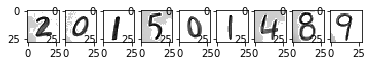

In [131]:
#입력, 은닉, 출력 노드의 수
input_nodes = 784
hidden_nodes1 = 200
hidden_nodes2 = 100
output_nodes = 10

#학습률
learning_rate = 0.05

#신경망의 인스턴스 생성
n = neuralNetwork(input_nodes, hidden_nodes1, hidden_nodes2, 
                  output_nodes, learning_rate)


# 신경망 학습시키기

# 주기(epoch)란 학습 데이터가 학습을 위해 사용되는 횟수를 의미
epochs = 10

for e in range(epochs):
    
    # 학습 데이터 모음 내의 모든 레코드 검색
    for record in training_data_list:
        #레코드를 분리
        all_values = record.split(',')
        #입력 값의 범위와 값 조정
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 *0.99) + 0.01
        #결과 값 생성 (실제 값인 0.99 외에는 모두 0.01)
        targets = numpy.zeros(output_nodes) + 0.01
        #all_values[0]는 이 레코드에 대한 결과 값
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)
        

        pass
    print("epochs ", e, " done")
pass

scorecard2 = []

position = 1
for image_file_name in glob.glob('my_real_images/my?_?.png'):
    correct_label = int(image_file_name[-5:-4])
    print("***correct_label:", correct_label)
    
    image_array = imageio.imread(image_file_name)    
    image_array = image_array[:,:,0] #***컬러를 그레이 스케일로 변환***
    
    image_data = 255.0 - image_array.reshape(784) 
    image_data = numpy.asfarray([x if x > 73 else 0 for x in image_data])
    #28x28 행렬 값을 784개 값의 리스트로 재구성
    image_data = (image_data / 255.0 * 0.99) + 0.01 #색상 값 반전
        
    # query the network
    outputs = n.query(image_data)
    print(outputs)
        
    # the index of the highest value corresponds to the label
    label = numpy.argmax(outputs)
    print("network says ", label)
        
    matplotlib.pyplot.subplot(1,9,position)
    matplotlib.pyplot.imshow(image_data.reshape(28,28), cmap='Greys', 
                             interpolation='None')
    position += 1;
    
    if (label == correct_label):
        #정답인 경우 성적표에 1을 더해 줌
        scorecard2.append(1)
    else:
        #정답이 아닌 경우 성적표에 0을 더해 줌
        scorecard2.append(0)
        pass
    pass

print(scorecard2)
scorecard2_array = numpy.asarray(scorecard2)
print("first nodes = ", hidden_nodes1, "second nodes = ",hidden_nodes2, 
      "rate = ", learning_rate, "performance = ", 
      scorecard2_array.sum()/ scorecard2_array.size)

#### 나만의 손글씨 인식률은 솔직하게 최악이었다.
#### 혹시나 모델을 잘못 만들었을 가능성을 배제할 수 없었기에 교재 저자의 깃에서 코드를 가져와 내 글씨로 테스트를 진행했다. 
#### 저자의 코드로 진행한 테스트 결과는 다음과 같다.
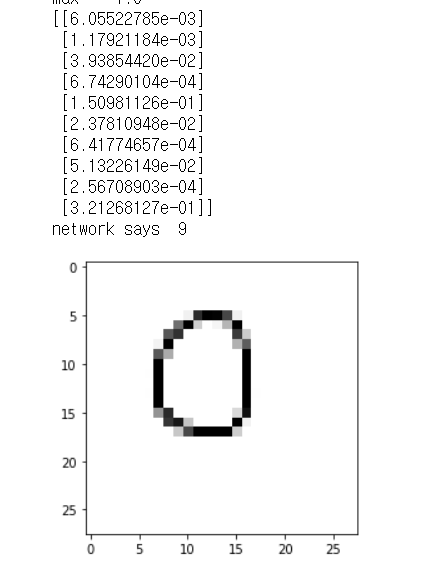
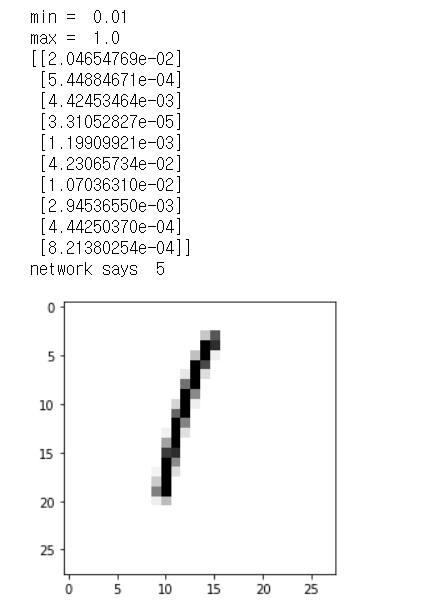
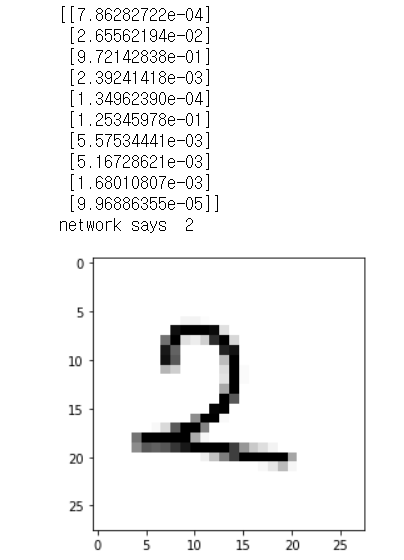
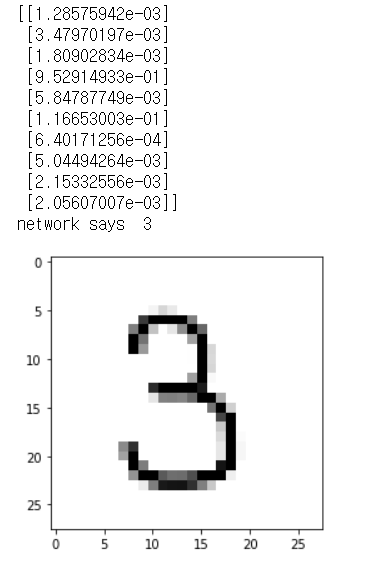
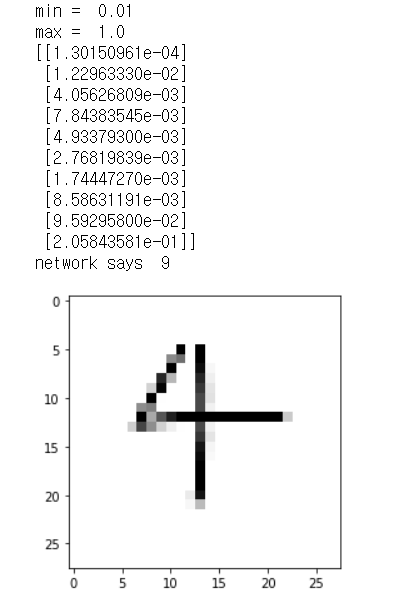
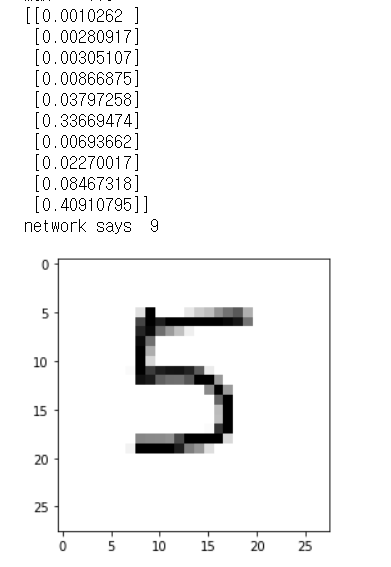
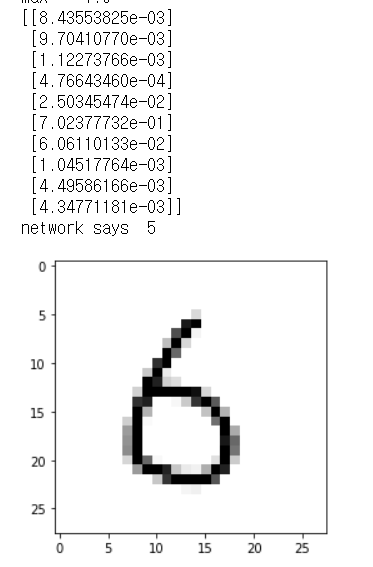
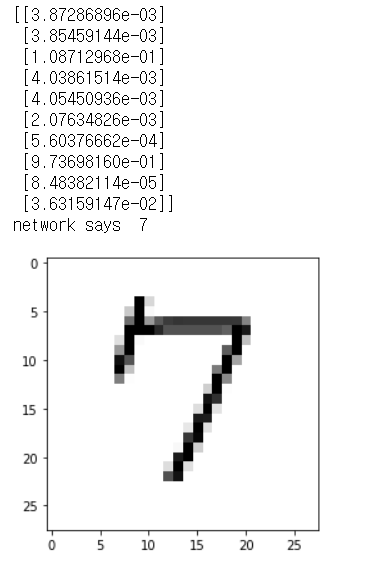
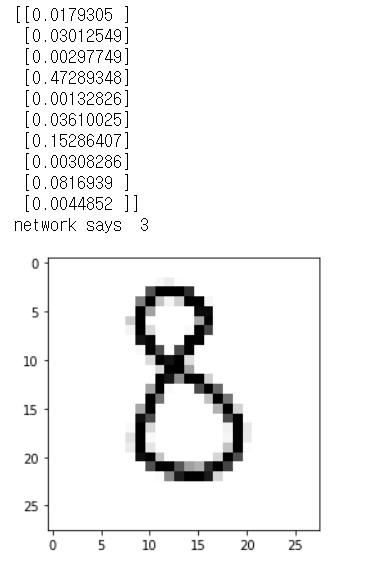
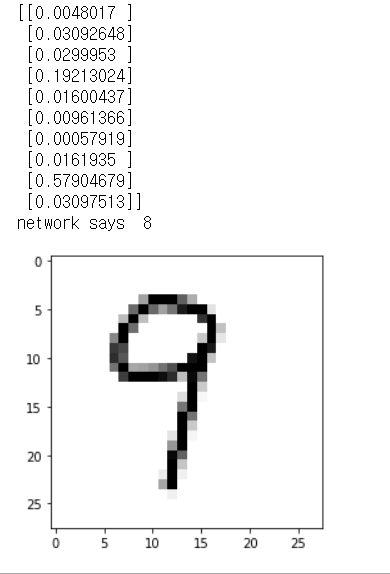

#### 제대로된 신경망임이 확실한 코드로 실행한 테스트의 결과 또한 내 신경망 모델의 결과처럼 심한 오답률을 보였으므로
#### 신경망 모델의 문제가 아닌 테스트 이미지 자체의 문제임을 확인했다.

#### 두번째로 추측한, 오답률에 영향을 끼친 요소는 트레이닝 데이터와 내 손글씨 데이터와의 형태 차이였다. 
#### 이에 손글씨 데이터 자체를 트레이닝 데이터의 모습과 비슷한 형태로 조작한 후 performance가 어떻게 달라지는지 비교해보았다.
#### 그 결과, 동일 조건에서 트레이닝 데이터와 비슷한 모양의 조작데이터의 학습률은 1에 가깝게 올라감을 확인할 수 있었다.

#### 하지만 위의 결과는 실제 손글씨가 아니며, 그저 테스트 데이터에 따라 학습률 차이가 크다는 것만을 증명해준 것에 불과하므로 
#### 손글씨를 다시 쓰되, 이번에는 손글씨의 굵기를 훨씬 더 굵게 바꾸었다. 
#### 그 결과로 학습률이 0.2~ 0.4를 벗어나지 못하던 초기 데이터보다 훨씬 나은 정확도를 결과로 뽑아내는 것을 위에서와 같이 확인할 수 있었다.

#### 그림판으로 그린 데이터의 테스트들은 학습률이 손글씨의 형태나 굵기의 정도에 따라서 크게 영향을 받음을 드러냈다.



#### 종이 그림의 경우에는 그림판 그림의 경우보다 더 상황이 좋지 못했다.
#### 사진으로 찍는 동안 배경과 그림자의 영향탓에 아예 모든 숫자를 틀리는 경우도 발생했기 때문이다.
#### 이에 추가적으로 약식 전처리 과정을 더했다. 임계값에 따라 이진화를 하는 방식으로 추후에 고쳐도 좋을 것이다.



In [134]:
print("201501489 최영진")

201501489 최영진
